# AISE4010 — Assignment 1
### Time Series Forecasting with Autoregressive Models and MLP

**Grade:** 100 points

## Instructions
Follow these steps before submitting your assignment:
1. Complete the notebook.
2. Make sure **all plots have axis labels**.
3. When finished, go to **Kernel → Restart & Run All** to ensure a clean, error‑free run.
4. Fix any errors until your notebook runs without problems.
5. Submit **one completed notebook** per group to OWL by the deadline.
6. Reference all external code and documentation you use.

## Dataset
- **File:** `weather.csv`
- **Location:** Szeged, Hungary
- **Frequency:** Daily (fixed calendar index)
- **Time span:** ≈ 2006–2016
- **Target:** `Temperature (C)`
- **Key variables:** Temperature (C), Pressure (millibars), Humidity, Appar Temperature (C), Wind Speed (km/h), Wind Bearing (degrees), Visibility (km)


## Question 1: Data Preprocessing (25%)

### Q1.1 Exploratory Data Analysis (2%)
1. Load the dataset and print the **first 6 rows**.  
2. Encode categorical variables (one‑hot). *(If none, report "none.")*


In [1]:
# Need the following for pmdarima to work in colab
# see: https://github.com/alkaline-ml/pmdarima/issues/591

!pip uninstall -y numpy pandas scikit-learn pmdarima Cython packaging setuptools statsmodels scipy mapie
!pip install pmdarima==2.0.4
!pip install pandas==2.2.2 scikit-learn==1.6.1 statsmodels==0.14.4 setuptools==69.5.1 packaging==23.2 Cython==3.1.2 scipy==1.11.4 mapie==0.6.0

## !!! wait for everything in this cell to finish before restarting the runtime !!!

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: pandas 2.2.2
Uninstalling pandas-2.2.2:
  Successfully uninstalled pandas-2.2.2
Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
Found existing installation: pmdarima 2.0.4
Uninstalling pmdarima-2.0.4:
  Successfully uninstalled pmdarima-2.0.4
Found existing installation: Cython 3.1.2
Uninstalling Cython-3.1.2:
  Successfully uninstalled Cython-3.1.2
Found existing installation: packaging 23.2
Uninstalling packaging-23.2:
  Successfully uninstalled packaging-23.2
Found existing installation: setuptools 69.5.1
Uninstalling setuptools-69.5.1:
  Successfully uninstalled setuptools-69.5.1
Found existing installation: statsmodels 0.14.4
Uninstalling statsmodels-0.14.4:
  Successfully uninstalled statsmodels-0.14.4
Found existing installation: scipy 1.11.4
Uninstalling scipy-1.11

  Using cached pandas-2.2.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (19 kB)
  Using cached scikit_learn-1.6.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached statsmodels-0.14.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.2 kB)
  Using cached setuptools-69.5.1-py3-none-any.whl.metadata (6.2 kB)
  Using cached packaging-23.2-py3-none-any.whl.metadata (3.2 kB)
  Using cached cython-3.1.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.9 kB)
  Using cached scipy-1.11.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached MAPIE-0.6.0-py3-none-any.whl.metadata (12 kB)
  Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached pandas-2.2.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.7 MB)
Using cached scikit_learn-1.6.1-cp312-cp312-manylinux_2_17_x86_64.manylin

In [1]:
# Restart The Runtime after the above is executed

In [2]:
# Load all pkgs at top, some prob wont be needed
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA, sarimax
import itertools
from pmdarima import auto_arima
import warnings
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from math import sqrt

In [3]:
# Answer to Q1.1.1

daily_unclean = pd.read_csv("weather.csv")
daily_unclean['Formatted Date'] = pd.to_datetime(daily_unclean['Formatted Date'])
daily_unclean.set_index('Formatted Date', inplace=True)


daily_unclean.head(6) # print rows 0 to 5 in a nice format

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Formatted Date,,,,,,,
2005-12-31,0.6,-4.0,0.89,17.1,140.0,10.0,1016.7
2006-01-01,4.1,-0.2,0.82,21.2,143.0,11.3,1012.0
2006-01-02,5.3,1.8,0.85,17.8,165.0,8.5,1010.4
2006-01-03,2.3,0.4,0.90,7.7,253.0,9.2,1021.2
2006-01-04,2.3,-0.7,0.91,12.2,35.0,8.4,981.8
2006-01-05,2.7,0.4,0.95,9.0,140.0,4.3,935.9


In [4]:
# Answer to Q1.1.2

print(None)
print("All variables are numerical, no categorical variables are present in this CSV")

None
All variables are numerical, no categorical variables are present in this CSV


### Q1.2 Handling Missing Data (11%)
1. Report missingness (**counts & %**) and show a heatmap for **Temperature, Pressure, Humidity**.
2. Use these two imputation methods:\
   a) Forward-fill (FFill).\
   b) Linear time interpolation.
3. Pick one method and save the result as `daily_clean`.
4. **Discussion** Which imputation method did you pick and why?  
5. **Discussion** How might your choice bias trend/seasonality estimates?  
6. **Discussion** Would your choice change if the gap were 30 days instead of 7? Explain briefly.


In [5]:
# Answer to Q1.2.1 (missingness part)

## get the counts of missing entreies per variable
null_df = daily_unclean.isnull()
null_per_col = null_df.sum()

## get the percentages of missing per variable
len_per_col = len(daily_unclean)
null_percent_per_col = 100 * null_per_col / len_per_col

## Cat these two series into a dataframe
missingness_df = pd.concat(
    [null_per_col, null_percent_per_col],
    axis=1
)
missingness_df.columns = ['Count Missing [items]', 'Percent Missing [%]']

missingness_df

,Count Missing [items],Percent Missing [%]
Temperature (C),47,1.169445
Apparent Temperature (C),0,0.000000
Humidity,40,0.995272
Wind Speed (km/h),0,0.000000
Wind Bearing (degrees),0,0.000000
Visibility (km),0,0.000000
Pressure (millibars),47,1.169445


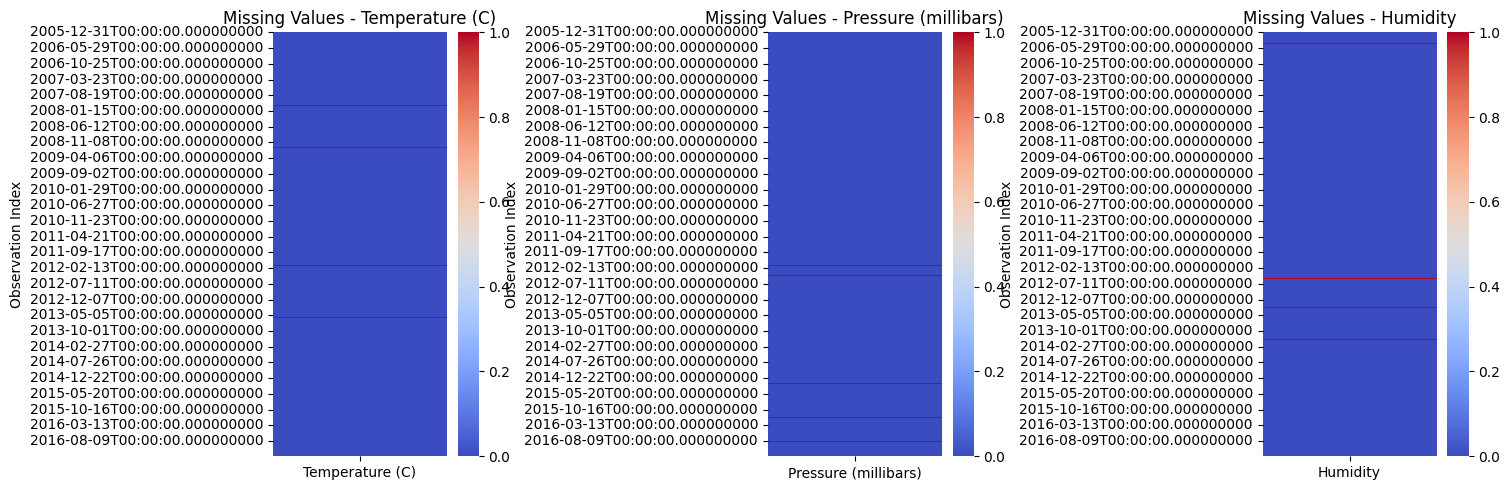

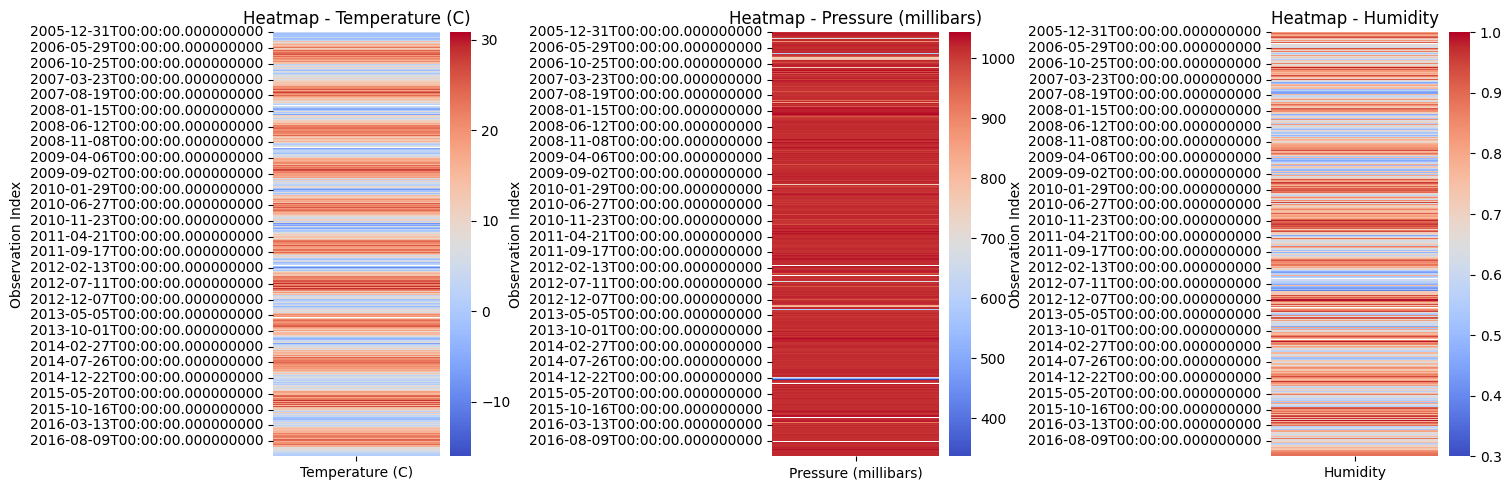




Temperature (C) has missing data at indicies: 
[Timestamp('2006-02-23 00:00:00'), Timestamp('2006-02-25 00:00:00'), Timestamp('2006-05-27 00:00:00'), Timestamp('2007-03-29 00:00:00'), Timestamp('2007-11-24 00:00:00'), Timestamp('2008-03-01 00:00:00'), Timestamp('2008-11-23 00:00:00'), Timestamp('2008-12-26 00:00:00'), Timestamp('2009-01-15 00:00:00'), Timestamp('2009-04-17 00:00:00'), Timestamp('2009-09-10 00:00:00'), Timestamp('2009-10-05 00:00:00'), Timestamp('2009-12-05 00:00:00'), Timestamp('2010-01-04 00:00:00'), Timestamp('2010-06-19 00:00:00'), Timestamp('2010-08-04 00:00:00'), Timestamp('2010-08-12 00:00:00'), Timestamp('2010-10-15 00:00:00'), Timestamp('2010-12-20 00:00:00'), Timestamp('2011-05-10 00:00:00'), Timestamp('2011-08-08 00:00:00'), Timestamp('2011-11-11 00:00:00'), Timestamp('2012-01-14 00:00:00'), Timestamp('2012-01-19 00:00:00'), Timestamp('2012-01-20 00:00:00'), Timestamp('2012-01-21 00:00:00'), Timestamp('2012-01-22 00:00:00'), Timestamp('2012-01-23 00:00:00'

In [6]:
# Answer to Q1.2.1 (heatmap)

# make 1 x 3 matplotlib layout and display heatmaps for the df
def plot_data_heatmap(daily_unclean):
  fig, ax = plt.subplots(1, 3, figsize=(15, 5))

  sns.heatmap(daily_unclean[['Temperature (C)']], ax=ax[0], cmap='coolwarm')
  ax[0].set_title("Heatmap - Temperature (C)")
  ax[0].set_ylabel("Observation Index")

  sns.heatmap(daily_unclean[['Pressure (millibars)']], ax=ax[1], cmap='coolwarm')
  ax[1].set_title("Heatmap - Pressure (millibars)")
  ax[1].set_ylabel("Observation Index")

  sns.heatmap(daily_unclean[['Humidity']], ax=ax[2], cmap='coolwarm')
  ax[2].set_title("Heatmap - Humidity")
  ax[2].set_ylabel("Observation Index")

  plt.tight_layout()
  plt.show()

def plot_missing_heatmap(daily_unclean):
  fig, ax = plt.subplots(1, 3, figsize=(15, 5))

  sns.heatmap(daily_unclean[['Temperature (C)']], ax=ax[0], cmap='coolwarm')
  ax[0].set_title("Missing Values - Temperature (C)")
  ax[0].set_ylabel("Observation Index")

  sns.heatmap(daily_unclean[['Pressure (millibars)']], ax=ax[1], cmap='coolwarm')
  ax[1].set_title("Missing Values - Pressure (millibars)")
  ax[1].set_ylabel("Observation Index")

  sns.heatmap(daily_unclean[['Humidity']], ax=ax[2], cmap='coolwarm')
  ax[2].set_title("Missing Values - Humidity")
  ax[2].set_ylabel("Observation Index")

  plt.tight_layout()
  plt.show()


# make the same but with a line (regular plot) for the df
def plot_line(daily_unclean):
  fig, ax = plt.subplots(1, 3, figsize=(15, 5))

  sns.lineplot(data=daily_unclean[['Temperature (C)']], ax=ax[0])
  ax[0].set_title("Line Plot - Temperature (C)")
  ax[0].set_xlabel("Year")
  ax[0].set_ylabel("Temperature (C)")

  sns.lineplot(data=daily_unclean[['Pressure (millibars)']], ax=ax[1])
  ax[1].set_title("Line Plot - Pressure (millibars)")
  ax[1].set_xlabel("Year")
  ax[1].set_ylabel("Pressure (millibars)")

  sns.lineplot(data=daily_unclean[['Humidity']], ax=ax[2])
  ax[2].set_title("Line Plot - Humidity")
  ax[2].set_xlabel("Year")
  ax[2].set_ylabel("Humidity")

  plt.tight_layout()
  plt.show()

# missing value heatmaps
plot_missing_heatmap(daily_unclean.isna())

# data heatmaps
plot_data_heatmap(daily_unclean)

# get indices of missing entries to see how long the period is
print("\n\n")
for col in ['Temperature (C)', "Pressure (millibars)", 'Humidity' ]:
  missing_idx = daily_unclean[daily_unclean[col].isna()].index
  print(f"{col} has missing data at indicies: \n{list(missing_idx)}\n")

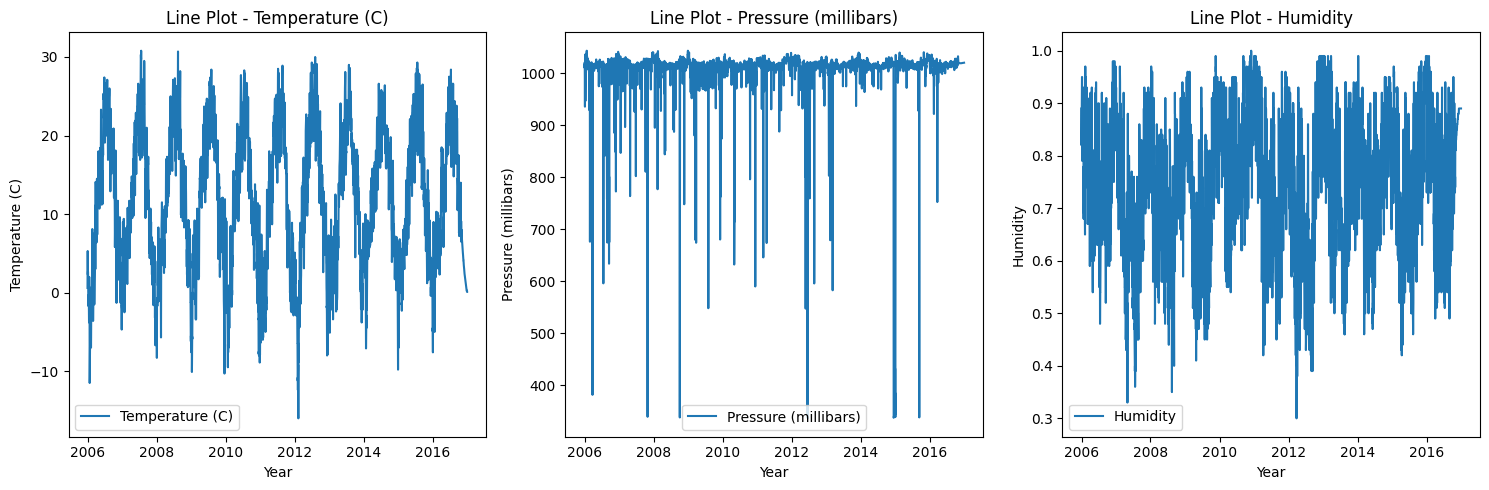

In [7]:
# Answer to Q1.2.2 (FFill)
daily_ffill = daily_unclean.ffill()

plot_line(daily_ffill)
plt.show()

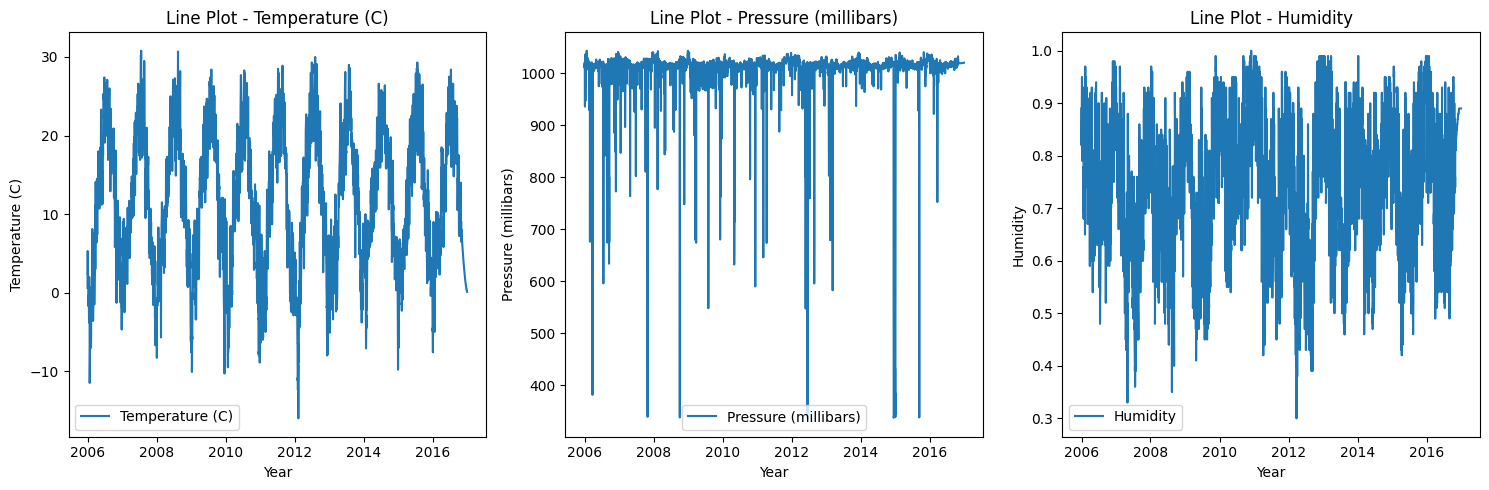

In [8]:
# Answer to Q1.2.2 (Linear Interpolation)
daily_linear = daily_unclean.interpolate(method = 'linear')

plot_line(daily_linear)
plt.show()

In [9]:
# Answer to Q1.2.3 (Pick an imputation method for dealing w/ missing vals)

daily_clean = daily_linear

**Answer to Q1.2.4**:


Here since we have temperature based data, we should be using *linear interpolation*. This is because we can safely assume at small time-scales that temperature is linearized (temperature shouldnt have any crazy steps from day to day, its always approximately linear over time)

If we use forward fill we will basically get a stable value for missing data, this might cause a sharp spike and disrupt the
seasonality/other factors of the data.

Furthermore we are going to be forcecasting with this data, and filling is generally not recommended when performing forecasting for time-series (covered in lecture slides).

Thus we should use linear-interpolation here.

**Answer to Q1.2.5**:


The choice to use *linear interpolation* will definitely bias trends and seasonality estimates. This is because we will lose the data for the 7 day period when it is missing (indexes 2210-2216 are missing in both temp and pressure data)

If there is a seasonality component with a length of <= 7 in this dataset, it will be distorted due to the linear interpolation done on this dataset. However the longer the seasonality length is the less the distortion should be in this dataset.

Considering that we have temperature data, there should be several seasonality components,

- A daily component (day is usually warmer than night)
- A yearly component (due to repeated season cycles)

Our overall seasonality should have something like the above. Since we expect a daily component, this can heavily distort the daily cycle of the time-series.

However because our data is sampled daily, there is no more daily component, thus we shouldnt expect a massive distortion in the yearly component of seasonality since we are filling in 7 days at most with a linear approximation.

**Answer to Q1.2.6**:


For a much larger gap of 30 days missing, I dont think any of the methods here (linear-interpolation or ffill) should be used, I still think linear-interpolation is the best of the two, even if it will now majorly impact the seasonality of the data. But its better than a plateau due to forward fill, which will essentially read as a "stable" value for 30 days, which is not accurate at all. At least the linear model will have a chance of producing some variation based on the delta of the boundary points.

Ideally we should be using Seasonal-Trend Decomposition for larger gaps, this would help to recreate the seasonality of the missing data such that there is a minimal distortion.

### Q1.3 Stationarity Analysis (12%)
1. Extract the **univariate** series `Temperature_Series = daily_clean['Temperature (C)']` and `Pressure_Series = daily_clean['Pressure (millibars)'].  
2. Report the results of a stationarity test (**ADF** or **KPSS**) for both series.
3. **Discussion:** Explain your conclusion about stationary analysis of your results.
4. Apply differencing on both series and plot **before/after** and report the stationary test results of your choice on differenced series.   
5. **Discussion:** Explain the reason for your choice of differencing technique for each series.
6. **Discussion:** Would you difference a series that is already stationary by ADF? When might that still help?

In [10]:
# Answer to Q1.3.1
Temperature_Series = daily_clean['Temperature (C)']
Pressure_Series = daily_clean['Pressure (millibars)']

========== Stationary Checking ==========
ADF for Temperature:
	ADF Statistic: -3.99
	p-value: 0.0014902414944360286
	result: stationary

ADF for Pressure:
	ADF Statistic: -14.32
	p-value: 1.141389008911619e-26
	result: stationary



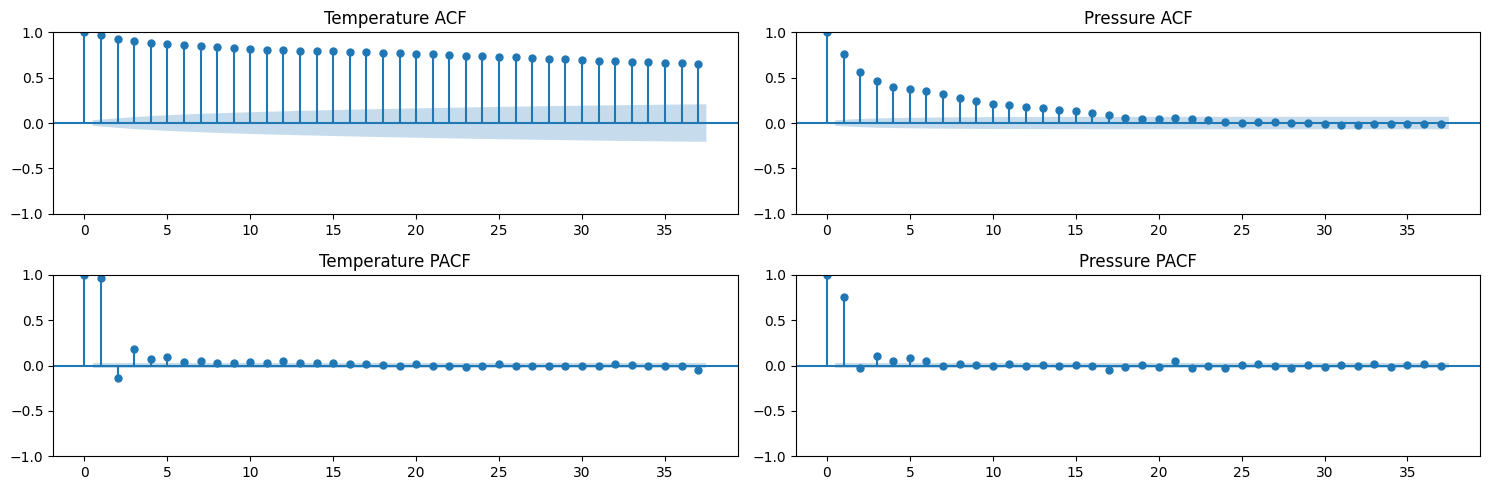

In [11]:
# Answer to Q1.3.2

def stationary_check(Temperature_Series, Pressure_Series, adf=True, plots=True):
  X_t = Temperature_Series.values
  X_p = Pressure_Series.values

  ADF_t = adfuller(X_t)
  ADF_p = adfuller(X_p)

  ## From Lecture Slides
  # ADF Result = ( p-value > 0.05 ) ? non-stationary : stationary
  stationary_t = "non-stationary" if ADF_t[1] > 0.05 else "stationary"
  stationary_p = "non-stationary" if ADF_p[1] > 0.05 else "stationary"

  print(f"{'='*10} Stationary Checking {'='*10}")

  if adf:
    print(f"ADF for Temperature:")
    print(f"\tADF Statistic: {ADF_t[0]:.2f}")
    print(f"\tp-value: {ADF_t[1]}")
    print(f"\tresult: {stationary_t}\n")

    print(f"ADF for Pressure:")
    print(f"\tADF Statistic: {ADF_p[0]:.2f}")
    print(f"\tp-value: {ADF_p[1]}")
    print(f"\tresult: {stationary_p}\n")

  if plots:
    ## Also plot ACF/PACF to be double sure
    ## From Lecture Slides
    # ACF  Plot = ( quickly drops to 0 ) ? stationary : non-stationary
    # PACF Plot = ( quickly drops to 0 ) ? stationary : non-stationary

    fig, ax = plt.subplots(2, 2, figsize=(15, 5))

    plot_acf(Temperature_Series, ax=ax[0][0])
    ax[0][0].set_title("Temperature ACF")

    plot_acf(Pressure_Series, ax=ax[0][1])
    ax[0][1].set_title("Pressure ACF")

    plot_pacf(Temperature_Series, ax=ax[1][0])
    ax[1][0].set_title("Temperature PACF")

    plot_pacf(Pressure_Series, ax=ax[1][1])
    ax[1][1].set_title("Pressure PACF")

    plt.tight_layout()
    plt.show()

## strange, ACF/PACF shows the data is non-stationary, but ADF says it is stationary????
stationary_check(Temperature_Series, Pressure_Series)


**Answer to Q1.2.3**:


After Running ADF on the Temperature and Pressure Data, the series is said to be *stationary* due to the p-value being less than 0.05. However i think the data is *non-stationary* due to the obvious seasonal component present.

This seems contradictory because the data has an obvious seasonality component in it (which should make it non-stationary). I also plotted the ACF/PACF to double confirm, and the plots align with my expectations of non-stationary.

I suspect the ADF test gave the wrong results because it tests if the data has a *unit-root* which is tied strongly to the mean of the data, since our data has a constant mean, I think thats why the ADF reported 'stationary' even though our data obviously is not stationary,

Differenced Series for Temperature has 1 NaN
Differenced Series for Pressure has 1 NaN
Dropping the leading NaN for both series...




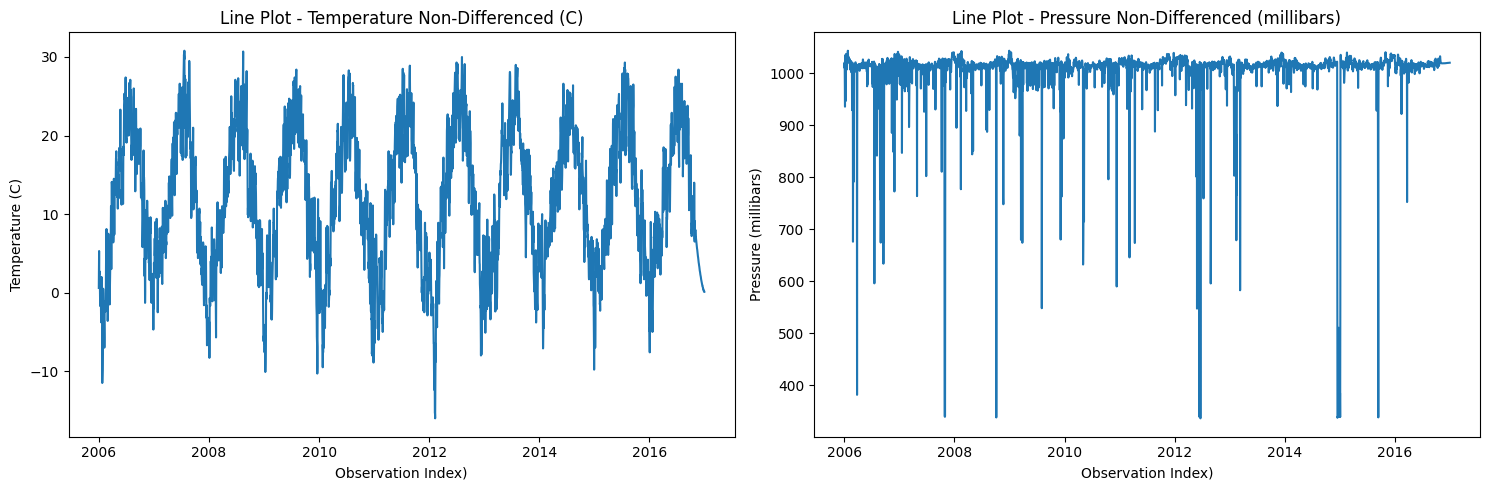

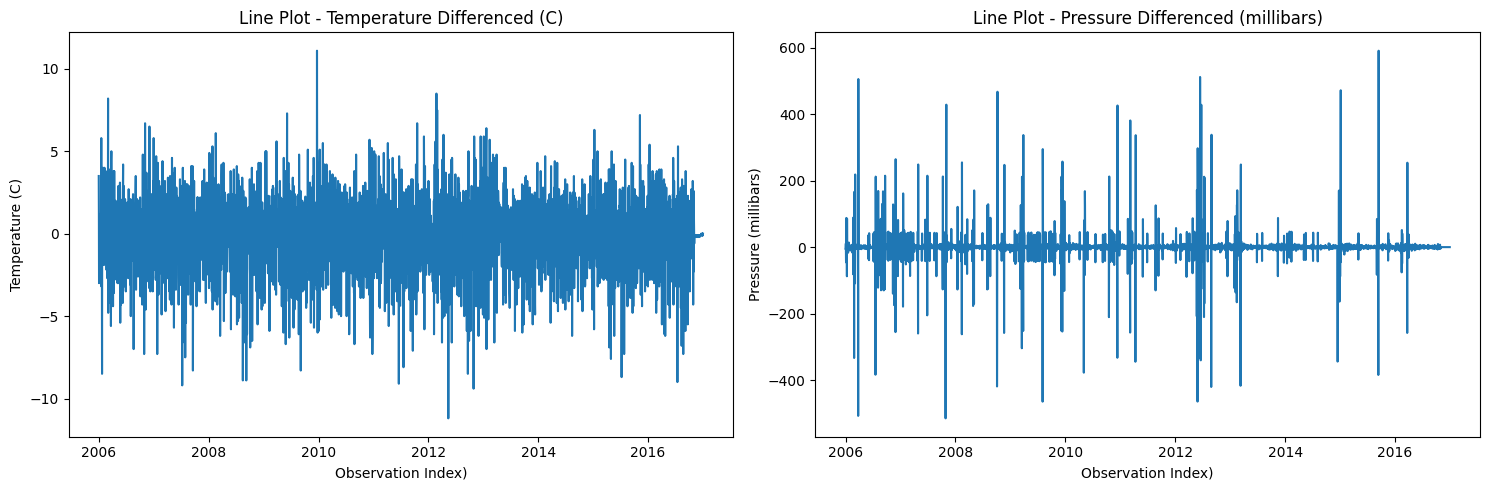

BEFORE DIFFERENCING:

========== Stationary Checking ==========
ADF for Temperature:
	ADF Statistic: -3.99
	p-value: 0.0014902414944360286
	result: stationary

ADF for Pressure:
	ADF Statistic: -14.32
	p-value: 1.141389008911619e-26
	result: stationary

AFTER DIFFERENCING:

========== Stationary Checking ==========
ADF for Temperature:
	ADF Statistic: -21.53
	p-value: 0.0
	result: stationary

ADF for Pressure:
	ADF Statistic: -16.50
	p-value: 2.1377374097239814e-29
	result: stationary



In [12]:
# Answer to Q1.3.4

def plot_line(temps, pressures, title=""):
  fig, ax = plt.subplots(1, 2, figsize=(15, 5))

  sns.lineplot(data=temps, ax=ax[0])
  ax[0].set_title(f"Line Plot - Temperature {title} (C)")
  ax[0].set_xlabel("Observation Index)")
  ax[0].set_ylabel("Temperature (C)")

  sns.lineplot(data=pressures, ax=ax[1])
  ax[1].set_title(f"Line Plot - Pressure {title} (millibars)")
  ax[1].set_xlabel("Observation Index)")
  ax[1].set_ylabel("Pressure (millibars)")

  plt.tight_layout()
  plt.show()


# Difference the series by 1 step
Temperature_Series_diff = Temperature_Series - Temperature_Series.shift(1)
Pressure_Series_diff = Pressure_Series - Pressure_Series.shift(1)

# Drop the NaN caused by differencing
numNant = Temperature_Series_diff.isna().sum()
numNanp = Pressure_Series_diff.isna().sum()
print(f"Differenced Series for Temperature has {numNant} NaN")
print(f"Differenced Series for Pressure has {numNant} NaN")
print("Dropping the leading NaN for both series...\n\n")
Temperature_Series_diff = Temperature_Series_diff.dropna()
Pressure_Series_diff = Pressure_Series_diff.dropna()

# plot before differencing
plot_line(Temperature_Series, Pressure_Series, title="Non-Differenced")

# plot after differencing
plot_line(Temperature_Series_diff, Pressure_Series_diff, title="Differenced")

# stationary check for differenced data
print("BEFORE DIFFERENCING:\n")
stationary_check(Temperature_Series, Pressure_Series, plots=False)

print("AFTER DIFFERENCING:\n")
stationary_check(Temperature_Series_diff, Pressure_Series_diff, plots=False)



**Answer to Q1.2.5**:


I have differenced both series with lag 1 differencing technique, this is to eliminate the seasonal components of the series,

Both series seem to have seasonal components, the temperature series is much more obvious, than the pressure series.

In the lectures this method was applied to reduce the seasonality of the data, Alongside the log transform. However the log transform is not suitable here because there is no clear trend in either the temperature or pressure series, so lag-1 differencing should suffice as enough to remove the seasonality.

**Answer to Q1.2.6**:


In this case our pre-differenced data was already deemed stationary by ADF, however we can tell from visual inspection that there is no clear trend, but there is an obvious seasonal componenet. Since the Data is obviously non-stationary, but ADF deems it as stationary, differencing is required here.

Overall, when there is a seasonal component, but not an overall trend component in the time-series data, differencing is required even if this data is deemed stationary by ADF prior to the differencing.

## Question 2: Model-Based Techniques (35%)

### Q2.1 ARIMA model identification and forecasting (20%)
1. Use `Temperature_Series` to plot **ACF/PACF** and list the choice of candidate order set for ARIMA: (p,d,q).  
2. **Discussion:** Explain the reasons for your choice of (p,d,q).
3. Select the orders by **AIC** using the training set (hold out the last **365 days** for testing).  
4. Fit the selected ARIMA on the training set and evaluate the predictions' **MAE/MSE** on the test set.
5. Plot predictions with **95% CI**.
6. Forecast the **next 365 days** and visualize with historical context and **95% CI**.


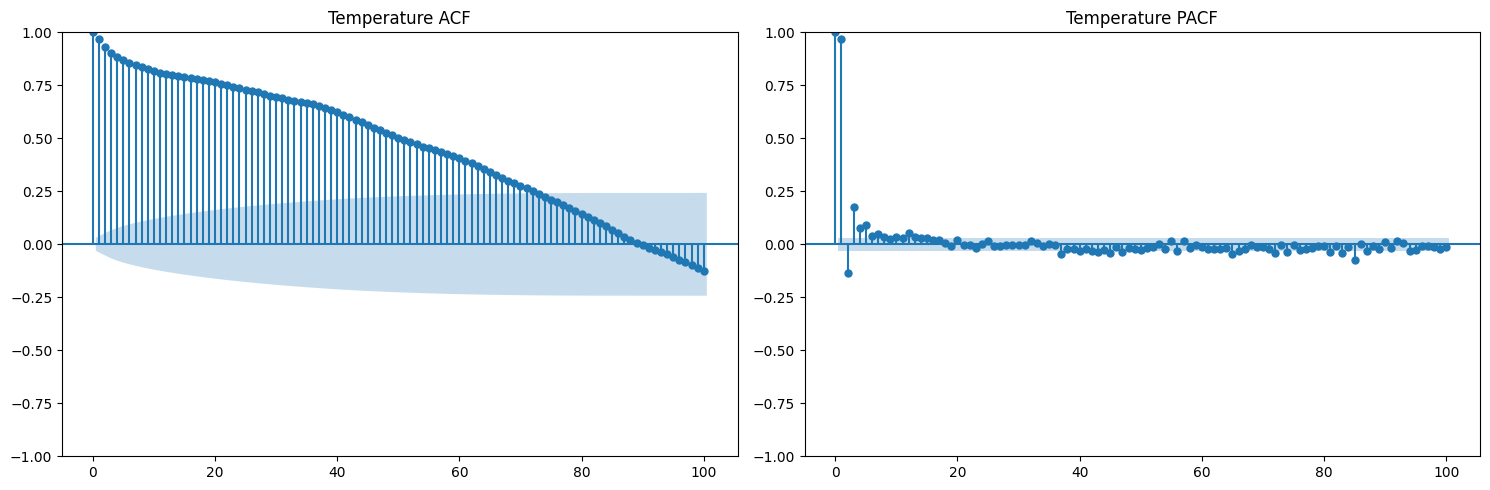

In [13]:
# Answer to Q2.1.1

# plot autocorellation and partial autocorellation
def plot_acf_pacf(series, label):
    ## Also plot ACF/PACF to be double sure
    ## From Lecture Slides
    # ACF  Plot = ( quickly drops to 0 ) ? stationary : non-stationary
    # PACF Plot = ( quickly drops to 0 ) ? stationary : non-stationary

    fig, ax = plt.subplots(1, 2, figsize=(15, 5))

    plot_acf(series, ax=ax[0], lags=100)
    ax[0].set_title(f"{label} ACF")

    plot_pacf(series, ax=ax[1], lags=100)
    ax[1].set_title(f"{label} PACF")


    plt.tight_layout()
    plt.show()

# Note that temperature-series is NOT the differenced series
plot_acf_pacf(Temperature_Series, "Temperature")

## AR parameter 'p' => PACF cuts off the zero beyond 'p' (choose 6 here)
## MA parameter 'q' => ACF cuts of to zero beyond 'q' (choose ~70 here)


**Answer to Q2.1.2**:


In order to choose the parameters of the AR, and MA models we have to take a look at the PACF and ACF plots respectively. Overall we can describe an ARIMA model with three parameters $p$ $d$ and $q$.

Where $p$ is the order of the AR (Auto regressive) component, $d$ is the degree of differencing involved (here d is equal to 1), and $q$ is the order of the MA (moving avg) component.

To choose the AR parameter $p$ we look at the PACF plot, and find the number of significant lags (stuff well above the blue shaded region). In the PACF plot this number seems to be around the 70 mark, so we can choose 70 here

To choose the MA parameter $q$ we look at the number of significant lags on the ACF plot, here that number is 5.

Note that differencing the series once results in a much nicer ACF, for which we can choose the AR portion to be around 6 or 7. The undifferenced series shows a slow exponential decay for ACF leading to the large value for $p$ here.

In [14]:
# Answer to Q2.1.3

temp_train = Temperature_Series.iloc[:-365]
temp_test = Temperature_Series.iloc[-365:]

warnings.filterwarnings("ignore")
iterative_fit = auto_arima(temp_train, trace=True, suppress_warnings=True)
print(iterative_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=15843.377, Time=6.11 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=26304.516, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=16123.245, Time=0.75 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=22215.184, Time=1.46 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=30081.225, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=15953.766, Time=1.96 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=15993.089, Time=2.57 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=15844.991, Time=7.04 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=15845.019, Time=6.59 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=16020.959, Time=1.25 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=15899.711, Time=5.11 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=15857.205, Time=6.23 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=15847.112, Time=5.60 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=15849.507, Time=5.18 sec

Best model:  ARIMA

In [15]:
# Answer to Q2.1.4

# get best arima model
best_order = iterative_fit.order
print(f"The best model is ARIMA{best_order}")
model = ARIMA(temp_train, order=best_order)
model_fit = model.fit()
print(model_fit.summary())


# define start/end points for preds
pred_start = len(temp_train)
pred_end   = len(temp_train) + len(temp_test) - 1


# make predictions
preds = model_fit.predict(start=pred_start, end=pred_end, typ='levels').rename('ARIMA Predictions')

# evaluate MSE/MAE
mse = mean_squared_error(temp_test, preds)
print(f"\n\nMSE: {mse}")

mae = mean_absolute_error(temp_test, preds)
print(f"MAE: {mae}")

The best model is ARIMA(2, 0, 2)
                               SARIMAX Results                                
Dep. Variable:        Temperature (C)   No. Observations:                 3654
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -7915.703
Date:                Mon, 22 Sep 2025   AIC                          15843.406
Time:                        19:58:00   BIC                          15880.627
Sample:                    12-31-2005   HQIC                         15856.661
                         - 01-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.4744      2.277      5.039      0.000       7.012      15.937
ar.L1          1.6410      0.031     52.639      0.000       1.580       1.702
ar.L2         -0.64

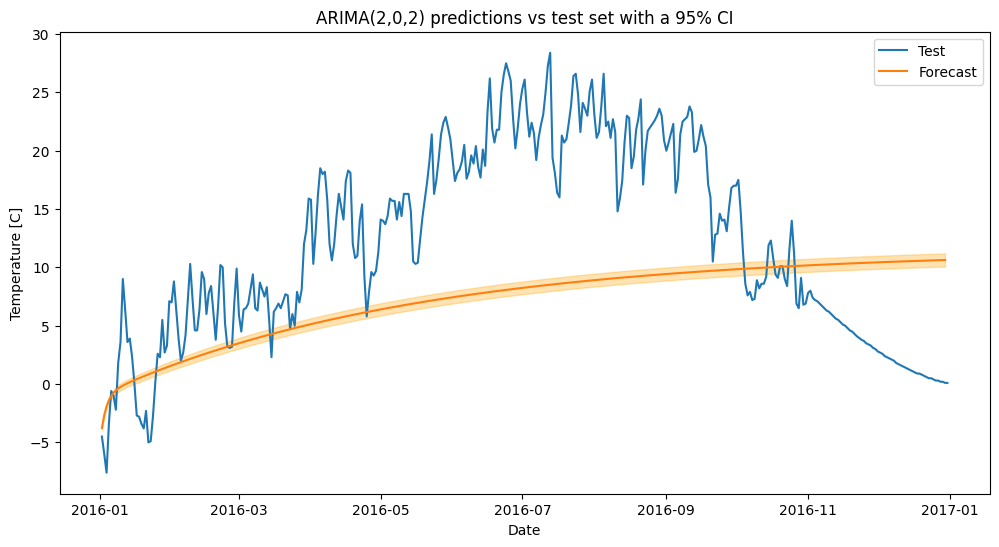

In [16]:
# Answer to Q2.1.5
pred_length = pred_end - pred_start
fc_pred = model_fit.get_forecast(steps=pred_length)

# get mean and confidence interval
preds_avg = fc_pred.predicted_mean
preds_ci = fc_pred.conf_int(alpha=0.95)

# plot the predictions
plt.figure(figsize=(12,6))
plt.plot(temp_test.index, temp_test, label='Test')
plt.plot(preds_avg.index, preds_avg, label='Forecast')

# fill in ci
plt.fill_between(
                 preds_ci.index,
                 preds_ci.iloc[:, 0],
                 preds_ci.iloc[:, 1],
                 alpha=0.3,
                 color='orange'
                 )

plt.title("ARIMA(2,0,2) predictions vs test set with a 95% CI")
plt.xlabel('Date')
plt.ylabel('Temperature [C]')
plt.legend()
plt.show()

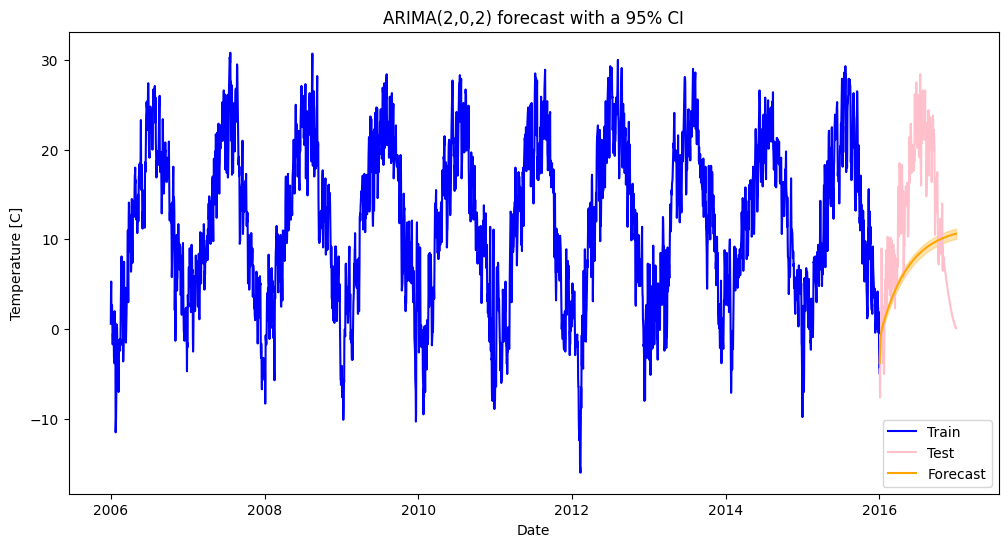

In [17]:
# Answer to Q2.1.6

pred_length = pred_end - pred_start
fc_pred = model_fit.get_forecast(steps=pred_length)

# get mean and confidence interval
preds_avg = fc_pred.predicted_mean
preds_ci = fc_pred.conf_int(alpha=0.95)

# plot the predictions
plt.figure(figsize=(12,6))
plt.plot(temp_train.index, temp_train, label='Train', color='blue')
plt.plot(temp_test.index, temp_test, label='Test', color='pink')
plt.plot(preds_avg.index, preds_avg, label='Forecast', color='orange')

# fill in ci
plt.fill_between(
                 preds_ci.index,
                 preds_ci.iloc[:, 0],
                 preds_ci.iloc[:, 1],
                 alpha=0.3,
                 color='orange'
                 )

plt.title("ARIMA(2,0,2) forecast with a 95% CI")
plt.xlabel('Date')
plt.ylabel('Temperature [C]')
plt.legend()
plt.show()

### Q2.2 SARIMA forecasting (15%)

1. Derive a **monthly** series from `daily_clean` and fit a **SARIMA** with seasonal period **12**. Hold out the **last 24 months** as test set for prediction.
2. Report the predictions' **MAE/MSE**.
3. Plot the the prediction with **95% CI**
4.  **Discussion:** Compare the ARIMA and SARIMA predictions and explain your findings.


In [18]:
# Answer to Q2.2.1 (fit SARIMA)

monthly_series = daily_clean['Temperature (C)'].resample('M').mean()

# create test/train
monthly_train = monthly_series.iloc[:-24]
monthly_test = monthly_series.iloc[-24:]

## Uncomment this to plot the monthly data to get a sense of seasonality period
# plt.figure(figsize=(24,6))
# plt.plot(monthly_series)
# plt.title("Monthly Temperature Series")
# plt.xlabel("Date")
# plt.ylabel("Temperature (C)")
# plt.show()

# fit arima with pmdarima
warnings.filterwarnings("ignore")
iterative_fit = auto_arima(monthly_train, trace=True, suppress_warnings=True, seasonal=True, m=12, D=1) # m = sesonality, D=1 forces auto=arima to consider seasonality (forces one seasonal differencing)
print(iterative_fit.summary())

# get fit params
best_order = iterative_fit.order
best_sorder = iterative_fit.seasonal_order

print(f"\n\nThe best model is SARIMA{best_order}{best_sorder}")

# fit the data to monthyl_train
model = ARIMA(monthly_train, order=best_order, seasonal_order=best_sorder)
model_fit = model.fit()
print(model_fit.summary())


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=2.26 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=455.204, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=437.830, Time=0.24 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.56 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=453.719, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=455.765, Time=0.07 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=425.440, Time=0.85 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=3.86 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.91 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=426.696, Time=0.40 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=427.389, Time=0.72 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=426.881, Time=1.25 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=425.492, Time=0.51 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept   : AIC=428.873, Time=1.59 sec
 ARIMA(1,0,0)(2,1,0)[12]             : AIC=423.90

In [20]:
# Answer to Q2.2.2

# get preds
preds_start = len(monthly_train)
preds_end = len(monthly_train) + len(monthly_test) - 1
preds = model_fit.predict(start=preds_start, end=preds_end, typ='levels').rename('SARIMA Predictions')

# report mae, mse
mse = mean_squared_error(monthly_test, preds)
print(f"\n\nMSE: {mse}")

mae = mean_absolute_error(monthly_test, preds)
print(f"MAE: {mae}")



MSE: 2.2769596341013165
MAE: 1.2103349642264123


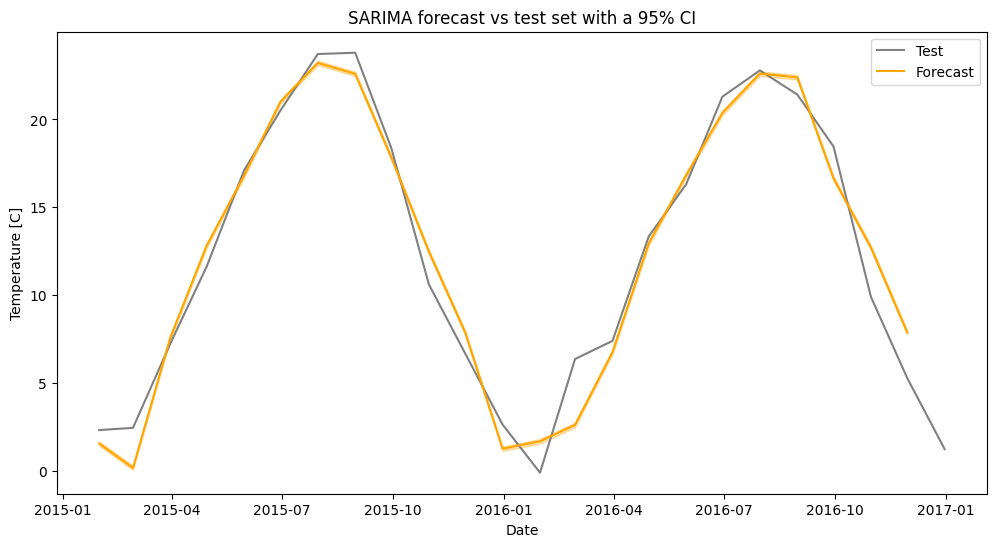

In [21]:
# Answer to Q2.2.3

# get preds w/ CI
pred_length = preds_end - preds_start
fc_pred = model_fit.get_forecast(steps=pred_length)

# get mean and confidence interval
preds_avg = fc_pred.predicted_mean
preds_ci = fc_pred.conf_int(alpha=0.95)

# plot the predictions
plt.figure(figsize=(12,6))
plt.plot(monthly_test.index, monthly_test, label='Test', color='gray')
plt.plot(preds_avg.index, preds_avg, label='Forecast', color='orange')

# fill in ci
plt.fill_between(
                 preds_ci.index,
                 preds_ci.iloc[:, 0],
                 preds_ci.iloc[:, 1],
                 alpha=0.3,
                 color='orange'
                 )

plt.title("SARIMA forecast vs test set with a 95% CI")
plt.xlabel('Date')
plt.ylabel('Temperature [C]')
plt.legend()
plt.show()

**Answer to Q2.2.4**:


It is quite easy to see that the SARIMA model significantly surpasses the performance of the ARIMA model. This can be seen from the MAE/MSE metrics between both models, as well as visually from the plots of the predictions.

The MAE/MSE for the ARIMA models predictions were significantly higher than the MAE/MSE of the SARIMA models predictions. Furthermore the plot of the SARIMA predicitons shows a much more accurate forecast, as it actually follows the seasonality expressed in the test set!

This makes sense, as the main difference between ARIMA and SARIMA is that SARIMA takes into account seasonality of the data, this is what the 'S' is SARIMA stands for (seasonal-ARIMA). Since our data has a big seasonal component, the fact that the SARIMA model does better aligns with our expectations.

## Question 3: Neural Networks for Time Series Forecasting (40%)
Use `daily_clean` for all parts.

### Q3.1 Sliding Window for Time Series — Univariate (2%)
1. Restructure **Temperature**: past **10 days** → **next day**.

2. Hold out last 20% as test set.


In [22]:
# Answer to Q3.1.1

daily_temps = daily_clean['Temperature (C)']

# use the sliding window technique to restructure data and prepare it for MLP
# here our sliding window is of length 10

curr_window = []
X = []
y = []

for i in range(10, len(daily_temps)):
  # get prev 10 datapoints and current one
  X.append(daily_temps[i-10:i])
  y.append(daily_temps[i])

X = np.array(X)
y = np.array(y)

In [23]:
# Answer to Q3.1.2

## Create 80/20 train/test split
split_perc = 0.8
split_idx = int(len(X) * split_perc)

X_trn = X[:split_idx]
X_tst = X[split_idx:]

y_trn = y[:split_idx]
y_tst = y[split_idx:]

print(f"For 80/20 Train/Test the split index is {split_idx}, Total length is {len(daily_temps)}")

For 80/20 Train/Test the split index is 3207, Total length is 4019


### Q3.2 MLP — Univariate (18%)
1. Build an MLP with one hidden layer of 64 neurons, ReLu activation, Adam optimizer with learning rate of 0.001 and batch_size=32, and train it for 20 epochs.
2. Report **RMSE/MAE**.
3. Plot **two figures**: (1) **last 100 test points** (true vs. predicted), (2) **scatter (true vs. predicted)** with the **y = x** line.
4. **Discussion:** Compare ARIMA vs. the univariate MLP in **RMSE/MAE** and **plots**. Which patterns does each capture better?
5. **Discussion:** Would increasing the input window beyond 10 days help? Why or why not?


In [24]:
# Answer to Q3.2.1 (1/2)

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

# cast arrays into torch tensors
X_trn = torch.from_numpy(X_trn).float()
X_tst = torch.from_numpy(X_tst).float()
y_trn = torch.from_numpy(y_trn).float()
y_tst = torch.from_numpy(y_tst).float()

# create the datasets
train_data = TensorDataset(X_trn, y_trn)
test_data = TensorDataset(X_tst, y_tst)


# create the loaders, shuffle is false here bc we have time series data
batch_sz = 32
train_loader = DataLoader(train_data, shuffle=False, batch_size=batch_sz)
test_loader = DataLoader(test_data, shuffle=False, batch_size=batch_sz)


# make the MLP
class UniMLP(nn.Module):

  def __init__(self):
    super().__init__()
    self.hl = nn.Linear(10, 64)
    self.relu = nn.ReLU()
    self.ol = nn.Linear(64, 1)

  def forward(self, x):
    x = self.hl(x)
    x = self.relu(x)
    x = self.ol(x)
    return x

umlp = UniMLP()

# make the optim
lr = 1e-3
optim = torch.optim.Adam(umlp.parameters(), lr=lr)

# define loss funciton
loss_fn = nn.MSELoss()

In [25]:
# Answer to Q3.2.1 (2/2)

n_epochs = 20

for epoch in range(n_epochs):
  umlp.train() # put model in train mode
  epoch_loss = 0

  for X_b, y_b in train_loader:
    optim.zero_grad()
    curr_preds = umlp(X_b)
    curr_loss = loss_fn(curr_preds, y_b)
    curr_loss.backward()
    optim.step()

    epoch_loss += curr_loss.item()

  # print out epoch loss so we can track training progress
  print(f"Epoch {epoch+1}: {epoch_loss/len(train_loader):.4f}")

Epoch 1: 54.2679
Epoch 2: 18.5118
Epoch 3: 18.3901
Epoch 4: 18.3088
Epoch 5: 18.2621
Epoch 6: 18.2319
Epoch 7: 18.2117
Epoch 8: 18.1978
Epoch 9: 18.1832
Epoch 10: 18.1765
Epoch 11: 18.1703
Epoch 12: 18.1669
Epoch 13: 18.1612
Epoch 14: 18.1570
Epoch 15: 18.1562
Epoch 16: 18.1547
Epoch 17: 18.1529
Epoch 18: 18.1528
Epoch 19: 18.1569
Epoch 20: 18.1586


In [26]:
# Answer to Q3.2.2

# get preds on test

umlp.eval()

with torch.no_grad():
  y_preds = umlp(X_tst)
  y_preds = y_preds.detach().numpy()

# report rmse/mse/mae
mse = mean_squared_error(y_tst, y_preds)
rmse = sqrt(mse)
mae = mean_absolute_error(y_tst, y_preds)
print(f"\n\nRMSE: {rmse}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")



RMSE: 3.0631295938852388
MSE: 9.382762908935547
MAE: 2.401228427886963


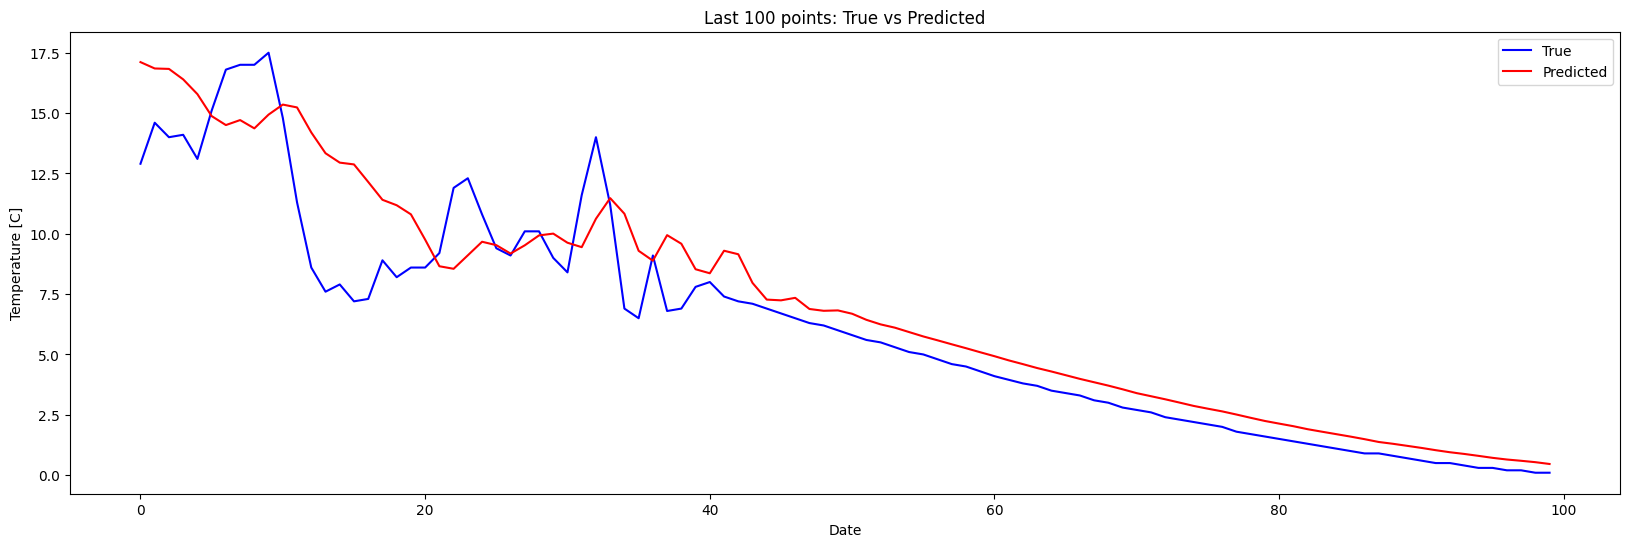

In [27]:
# Answer to Q3.2.3 (1/2)

plt.figure(figsize=(20,6)) # i want a   w i d e   graph
plt.plot(y_tst[-100:], label='True', color='blue')
plt.plot(y_preds[-100:], label='Predicted', color='red')
plt.title('Last 100 points: True vs Predicted')
plt.ylabel('Temperature [C]')
plt.xlabel('Date')
plt.legend()
plt.show()

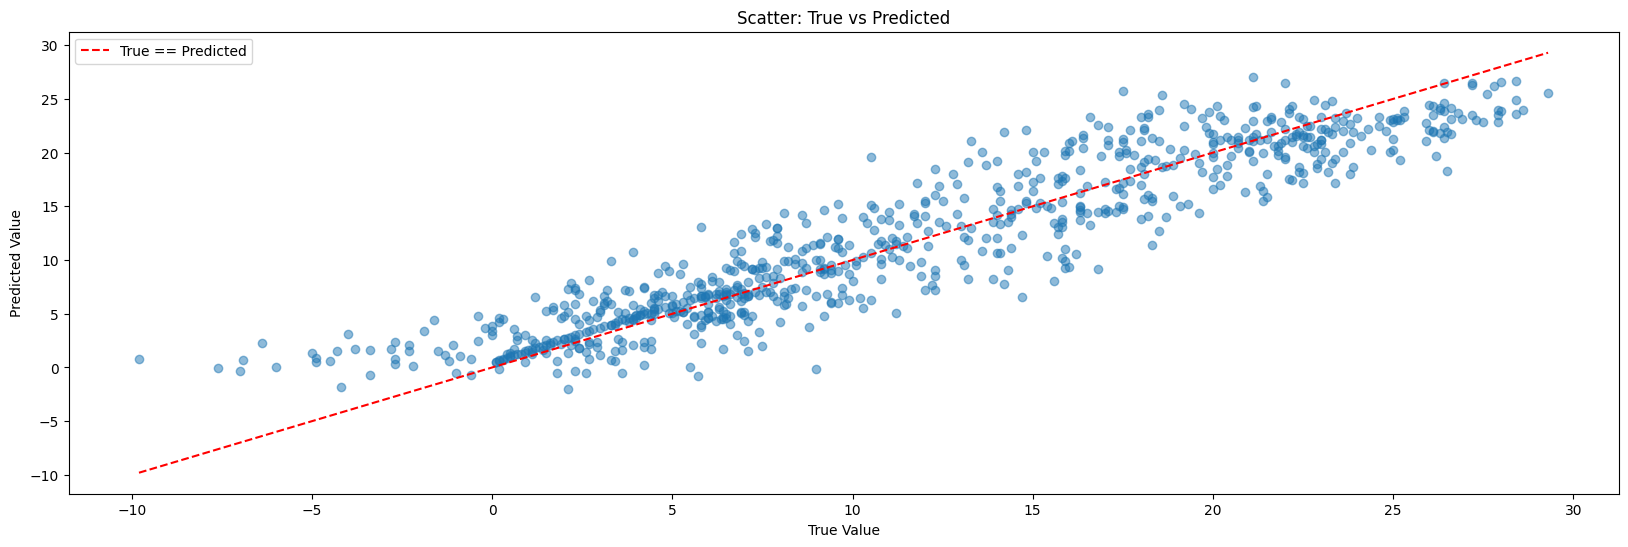

In [28]:
# Answer to Q3.2.3 (2/2)

plt.figure(figsize=(20,6))
plt.scatter(y_tst, y_preds, alpha=0.5)
plt.plot([y_tst.min(), y_tst.max()], [y_tst.min(), y_tst.max()], 'r--', label='True == Predicted')
plt.xlabel("True Value")
plt.ylabel("Predicted Value")
plt.title("Scatter: True vs Predicted")
plt.legend()
plt.show()


**Answer to Q3.2.4**:


Taking a look at the MAE/MSE and plots of the ARIMA forecast vs the Univariate MLP (called UMLP here onwards) forecast, we can easily see that the UMLP captures the data much better than the ARIMA model.

This is visible both from the metrics (MSE/MAE/RMSE) as well as the plots themselves, as there is a huge visible difference between their performance.

**Answer to Q3.2.5**:


I think increasing the window beyond 10 days would help a bit, even though our MAE/MSE/RMSE our already quite good, with a window of 10 days, the NN doesnt really see the entire seasonal cycle, I think it would massively help in terms of seasonality purposes if we increased the input window from 10, to about half a month, that way the model can see half the seasonal cycle (as it looks like a sine wave) and that should be the minimum information needed to recreate the sine-wave pattern, since it has the same quarter-period curvature.

### Q3.3 MLP — Multivariate (20%)
1. Use **Temperature & Pressure** for the past **10 days** as the inputs and **next‑day Temperature** as the target.
2. Hold out last 20% as test set.
3. Build a Multivariate MLP with one hidden layer of 64 neurons, ReLu activation, Adam optimizer with learning rate of 0.001 and batch_size=32, and train it for 20 epochs.
4. Report **RMSE/MAE**.
5. Plot **two figures**: (1) **last 100 test points** (true vs. predicted), (2) **scatter (true vs. predicted)** with the **y = x** line.
6. **Discussion:** Did Pressure improve Temperature forecasting vs. univariate? Why might it help/hurt?  
7. **Discussion:** Suggest two additional features you would add next and why?


In [29]:
# Answer to Q3.3.1

# clear old vars so i can reuse names without worriying
X = None
y = None
X_trn = None
X_tst = None
y_trn = None
y_tst = None

feats = daily_clean[['Temperature (C)', 'Pressure (millibars)']].values

window_size = 10
X = []
y = []

for i in range(window_size, len(feats)):
  # past 10 days of temps/pressures
  X.append(feats[i-window_size:i])
  y.append(feats[i, 0])

  # flatten the X array now
  X[i-window_size] = X[i-window_size].flatten()

X = np.array(X)
y = np.array(y)

print(X[0])
print(y[0])

[ 6.0000e-01  1.0167e+03  4.1000e+00  1.0120e+03  5.3000e+00  1.0104e+03
  2.3000e+00  1.0212e+03  2.3000e+00  9.8180e+02  2.7000e+00  9.3590e+02
  2.6000e+00  1.0236e+03  9.0000e-01  1.0302e+03 -1.2000e+00  1.0355e+03
 -1.7000e+00  1.0345e+03]
-0.5


In [30]:
# Answer to Q3.3.2

## Create 80/20 train/test split
split_perc = 0.8
split_idx = int(len(X) * split_perc)

X_trn = X[:split_idx]
X_tst = X[split_idx:]

y_trn = y[:split_idx]
y_tst = y[split_idx:]

print(f"For 80/20 Train/Test the split index is {split_idx}, Total length is {len(daily_temps)}")

# cast arrays into torch tensors
X_trn = torch.from_numpy(X_trn).float()
X_tst = torch.from_numpy(X_tst).float()
y_trn = torch.from_numpy(y_trn).float()
y_tst = torch.from_numpy(y_tst).float()

# create the datasets
train_data = TensorDataset(X_trn, y_trn)
test_data = TensorDataset(X_tst, y_tst)


# create the loaders, shuffle is false here bc we have time series data
batch_sz = 32
train_loader = DataLoader(train_data, shuffle=False, batch_size=batch_sz)
test_loader = DataLoader(test_data, shuffle=False, batch_size=batch_sz)

For 80/20 Train/Test the split index is 3207, Total length is 4019


In [31]:
# Answer to Q3.3.3

# make the MLP
class MultiMLP(nn.Module):

  def __init__(self, num_feats):
    super().__init__()
    self.hl = nn.Linear(10 * num_feats, 64) # expects a flattened version
    self.relu = nn.ReLU()
    self.ol = nn.Linear(64, 1)

  def forward(self, x):
    x = self.hl(x)
    x = self.relu(x)
    x = self.ol(x)
    return x

mmlp = MultiMLP(2)

# make the optim
lr = 1e-3
optim = torch.optim.Adam(mmlp.parameters(), lr=lr)

# define loss funciton
loss_fn = nn.MSELoss()

n_epochs = 20

for epoch in range(n_epochs):
  mmlp.train() # put model in train mode
  epoch_loss = 0

  for X_b, y_b in train_loader:
    X_b = X_b.reshape((X_b.shape[0], -1)) # flatten X_b for expected input shape in mmlp
    optim.zero_grad()
    curr_preds = mmlp(X_b)
    curr_loss = loss_fn(curr_preds, y_b)
    curr_loss.backward()
    optim.step()

    epoch_loss += curr_loss.item()

  # print out epoch loss so we can track training progress
  print(f"Epoch {epoch+1}: {epoch_loss/len(train_loader):.4f}")

Epoch 1: 473.0470
Epoch 2: 117.2540
Epoch 3: 54.5886
Epoch 4: 52.4328
Epoch 5: 56.2400
Epoch 6: 62.3539
Epoch 7: 62.3806
Epoch 8: 63.2191
Epoch 9: 63.3362
Epoch 10: 57.7025
Epoch 11: 56.0765
Epoch 12: 54.1343
Epoch 13: 53.0292
Epoch 14: 51.3167
Epoch 15: 49.6066
Epoch 16: 49.0797
Epoch 17: 47.1383
Epoch 18: 46.1350
Epoch 19: 44.7922
Epoch 20: 44.6976


In [32]:
# Answer to Q3.3.4

# get preds on test

mmlp.eval()

with torch.no_grad():
  y_preds = mmlp(X_tst)
  y_preds = y_preds.detach().numpy()

# report rmse/mse/mae
mse = mean_squared_error(y_tst, y_preds)
rmse = sqrt(mse)
mae = mean_absolute_error(y_tst, y_preds)
print(f"\n\nRMSE: {rmse}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")



RMSE: 5.977378161252405
MSE: 35.72904968261719
MAE: 5.174964427947998


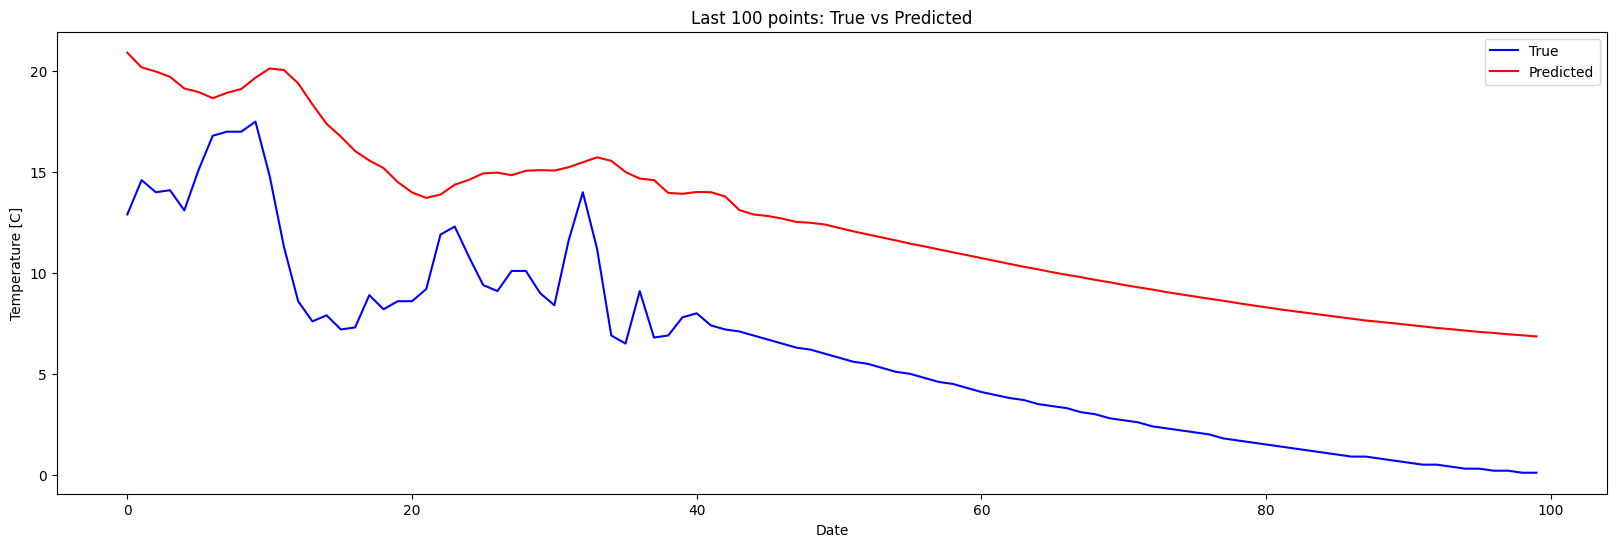

In [33]:
# Answer to Q3.3.5 (1/2)

plt.figure(figsize=(20,6)) # i want a   w i d e   graph
plt.plot(y_tst[-100:], label='True', color='blue')
plt.plot(y_preds[-100:], label='Predicted', color='red')
plt.title('Last 100 points: True vs Predicted')
plt.ylabel('Temperature [C]')
plt.xlabel('Date')
plt.legend()
plt.show()

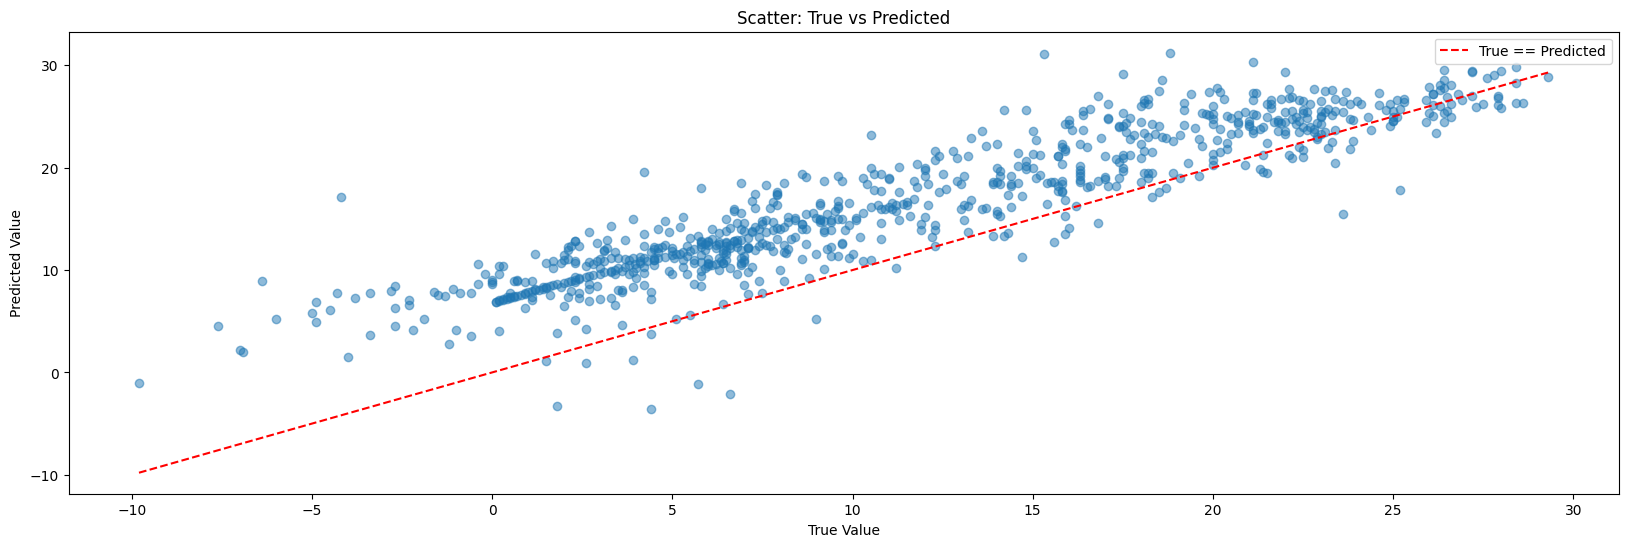

In [34]:
# Answer to Q3.3.5 (2/2)

plt.figure(figsize=(20,6))
plt.scatter(y_tst, y_preds, alpha=0.5)
plt.plot([y_tst.min(), y_tst.max()], [y_tst.min(), y_tst.max()], 'r--', label='True == Predicted')
plt.xlabel("True Value")
plt.ylabel("Predicted Value")
plt.title("Scatter: True vs Predicted")
plt.legend()
plt.show()


**Answer to Q3.3.6**:


Comparing multi-to-univariate analysis for the Temperature predictions, we can see from the MSE/MAE/RMSE that the Multivariate MLP did worse than the univariate MLP. I suspect that this is because of the feature's individual scales.

If we compare the magnitude of the temperature data against the magnitude of the pressure data, there is a difference of around a factor of 100, i suspect that this difference in magnitude is what caused the multivariate mlp to perform worse than the univariate MLP.

Overall, i think if the features were scaled appropriately, and if any extra preprocessing needed to be done, the multivariate MLP would perform at least as well as (if not better than) the univarate MLP

**Answer to Q3.3.7**:


Assuming we are still trying to predict temperature, I think we should add these two following features as well:

- Humidity
- Wind Speed

From my experience of the weather i think that these factors are the most significant (aside from Pressure) that can contribute to the temperature of a day.

I dont think Wind-Direction matters much, and neither would the visibility, as how far you can see probably isnt related to how hot or cold it is outside.

Overall I think adding the Humidity and Wind-Speed as features might result in a better multivariate analysis as long as they are scaled properly.